In [1]:
from src.MO_DQN import MO_DQN
import mo_gymnasium as mo_gym
from src.gridsearch import gridsearch
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting

### Configure and run the experiments

In [2]:
#experiment configurations
env_config_1 = {
        "observation": {
            "type": "MultiAgentObservation",
            "observation_config": {
                "type": "OccupancyGrid",
                "vehicles_count": 15,
                "features": ["presence", "x", "y", "vx", "vy"],
                "features_range": {
                    "x": [-100, 100],
                    "y": [-100, 100],
                    "vx": [-20, 20],
                    "vy": [-20, 20]
                },
                "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
                "grid_step": [5, 5],
            }
        }
    }

env_config_2 = {
        "collision_reward": 0,
        "observation": {
            "type": "MultiAgentObservation",
            "observation_config": {
                "type": "OccupancyGrid",
                "vehicles_count": 15,
                "features": ["presence", "x", "y", "vx", "vy"],
                "features_range": {
                    "x": [-100, 100],
                    "y": [-100, 100],
                    "vx": [-20, 20],
                    "vy": [-20, 20]
                },
                "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
                "grid_step": [5, 5],
            }
        }
    }

run_config = {
    "env": [env_config_1, env_config_2],
    "init": {
         "gamma": [0.9],
         "replay_buffer_size": [1000],
         "use_reward_normalisation_wrapper": [False],
         "use_default_reward_normalisation": [True]
    },
    "train": {
         "num_iterations" : 150_000,
         "inv_target_update_frequency": 20,
         "epsilon_start": 0.9,
         "epsilon_end": 0
    },
    "eval": {
        "num_repetitions": 20,
        "num_points": 30,
        "hv_reference_point": np.ndarray([0,0]),
        "episode_recording_interval": None,
        "render_episodes": False
    },
}

In [3]:
#run the experiments
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
gridsearch(MO_DQN, env, run_config, 11, csv_file_path="data/reward_crashes/")


Weight tuple: 100%|██████████| 2/2 [00:10<00:00,  5.43s/it]



Training iterations:  92%|█████████▎| 185/200 [00:29<00:02,  6.25it/s]



KeyboardInterrupt: 

### Data preprocessing

In [2]:
#load the data
df_complete = pd.read_csv("data/reward_crashes/experiment_merged.csv")
display(df_complete.info())
display(df_complete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2400 non-null   int64  
 1   repetition_number                 2400 non-null   int64  
 2   weight_index                      2400 non-null   int64  
 3   weight_tuple                      2400 non-null   object 
 4   num_iterations                    2400 non-null   int64  
 5   normalised_speed_reward           2400 non-null   float64
 6   normalised_energy_reward          2400 non-null   float64
 7   raw_speed_reward                  2400 non-null   float64
 8   raw_energy_reward                 2400 non-null   float64
 9   env_config_id                     2400 non-null   int64  
 10  gamma                             2400 non-null   float64
 11  replay_buffer_size                2400 non-null   int64  
 12  use_re

None

,Unnamed: 0,repetition_number,weight_index,weight_tuple,num_iterations,normalised_speed_reward,normalised_energy_reward,raw_speed_reward,raw_energy_reward,env_config_id,gamma,replay_buffer_size,use_reward_normalisation_wrapper,use_default_reward_normalisation
0,0,0,0,"[0.0, 1.0]",80,0.074401,0.906732,5.952080,72.538586,0,0.9,1000,False,False
1,1,1,0,"[0.0, 1.0]",80,0.172641,0.998061,13.811243,79.844897,0,0.9,1000,False,False
2,2,2,0,"[0.0, 1.0]",80,0.167457,0.999788,13.396524,79.983031,0,0.9,1000,False,False
3,3,3,0,"[0.0, 1.0]",80,0.111901,0.944232,8.952080,75.538586,0,0.9,1000,False,False
4,4,4,0,"[0.0, 1.0]",80,0.109771,0.942149,8.781668,75.371920,0,0.9,1000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,595,15,29,"[1.0, 0.0]",36,0.824999,0.567884,29.699951,20.443828,0,0.9,1000,True,True
2396,596,16,29,"[1.0, 0.0]",80,0.762498,0.697352,60.999837,55.788157,0,0.9,1000,True,True
2397,597,17,29,"[1.0, 0.0]",80,0.918405,0.623849,73.472403,49.907928,0,0.9,1000,True,True
2398,598,18,29,"[1.0, 0.0]",80,0.887777,0.595130,71.022143,47.610433,0,0.9,1000,True,True


In [3]:
#preprocess the dataframe
multi_index_list = ['use_default_reward_normalisation', 'use_reward_normalisation_wrapper']
value_list = ['normalised_speed_reward', 'normalised_energy_reward']
table = pd.pivot_table(df_complete, values=value_list, index=multi_index_list,
                        columns=['weight_index'], aggfunc="mean")
table = table.reset_index()
table['experiment_index'] = table.index
display(table)

use_default_reward_normalisation  \
weight_index                                    
0                                       False   
1                                       False   
2                                        True   
3                                        True   

             use_reward_normalisation_wrapper normalised_energy_reward  \
weight_index                                                         0   
0                                       False                 0.973822   
1                                        True                 0.994895   
2                                       False                 0.981355   
3                                        True                 0.870841   

                                                                          \
weight_index         1         2         3         4         5         6   
0             0.973529  0.987399  0.976377  0.977521  0.961528  0.959630   
1             0.996356  0.995422  0.988893  0.987002  0.993649  0.988723   
2             0.974477  0.989096  0.987603  0.992175  0.987800  0.987978   
3             0.865837  0.861887  0.874384  0.877220  0.876331  0.884025   

                        ... normalised_speed_reward                      \
weight_index         7  ...                      21        22        23   
0             0.941576  ...                0.825533  0.786522  0.837845   
1             0.982767  ...                0.746062  0.838801  0.805565   
2             0.988389  ...                0.770159  0.835675  0.762859   
3             0.978316  ...                0.806016  0.852344  0.721163   

                                                                          \
weight_index        24        25        26        27        28        29   
0             0.816817  0.805992  0.844233  0.811167  0.821980  0.803905   
1             0.739320  0.817903  0.792683  0.798251  0.801801  0.840636   
2             0.843871  0.869137  0.881126  0.830814  0.806461  0.872746   
3             0.851533  0.756302  0.761657  0.810945  0.792586  0.806633   

             experiment_index  
weight_index                   
0                           0  
1                           1  
2                           2  
3                           3  

[4 rows x 63 columns]

In [4]:
multi_index_list = ['use_reward_normalisation_wrapper', 'use_default_reward_normalisation', "weight_index"]

grouped_df = df_complete.groupby(multi_index_list)[value_list].mean()
index = grouped_df.index
grouped_df = grouped_df.reset_index()
grouped_df.set_index(index, inplace=True)
multi_index_list.remove("weight_index")
grouped_df["experiment"] = grouped_df[multi_index_list].apply(tuple, axis=1)
display(grouped_df.info())
display(grouped_df)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 120 entries, (False, False, 0) to (True, True, 29)
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   use_reward_normalisation_wrapper  120 non-null    bool   
 1   use_default_reward_normalisation  120 non-null    bool   
 2   weight_index                      120 non-null    int64  
 3   normalised_speed_reward           120 non-null    float64
 4   normalised_energy_reward          120 non-null    float64
 5   experiment                        120 non-null    object 
dtypes: bool(2), float64(2), int64(1), object(1)
memory usage: 6.0+ KB


None

use_reward_normalisation_wrapper  \
use_reward_normalisation_wrapper use_default_reward_normalisation weight_index                                     
False                            False                            0                                        False   
                                                                  1                                        False   
                                                                  2                                        False   
                                                                  3                                        False   
                                                                  4                                        False   
...                                                                                                          ...   
True                             True                             25                                        True   
                                                                  26                                        True   
                                                                  27                                        True   
                                                                  28                                        True   
                                                                  29                                        True   

                                                                                use_default_reward_normalisation  \
use_reward_normalisation_wrapper use_default_reward_normalisation weight_index                                     
False                            False                            0                                        False   
                                                                  1                                        False   
                                                                  2                                        False   
                                                                  3                                        False   
                                                                  4                                        False   
...                                                                                                          ...   
True                             True                             25                                        True   
                                                                  26                                        True   
                                                                  27                                        True   
                                                                  28                                        True   
                                                                  29                                        True   

                                                                                weight_index  \
use_reward_normalisation_wrapper use_default_reward_normalisation weight_index                 
False                            False                            0                        0   
                                                                  1                        1   
                                                                  2                        2   
                                                                  3                        3   
                                                                  4                        4   
...                                                                                      ...   
True                             True                             25                      25   
                                                                  26                      26   
                                                                  27                      27   
      

In [5]:
nds = NonDominatedSorting()
value_columns = ["normalised_speed_reward", "normalised_energy_reward"]
#add pareto information
grouped_df["pareto"] = False
experiment_indices = grouped_df["experiment"].unique()
for index in experiment_indices:
    #get data of a specific experiment
    data = grouped_df[grouped_df["experiment"] == index]
    #compute the indices containing non-dominated points
    pareto_indices = nds.do(data[value_columns], only_non_dominated_front=True)
    #set pareto flag to True at the corresponding indices of the entire dataframe
    grouped_df.loc[(grouped_df["experiment"] == index) & (data["weight_index"].isin(pareto_indices)),"pareto"] = True


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



<Axes: xlabel='normalised_speed_reward', ylabel='normalised_energy_reward'>

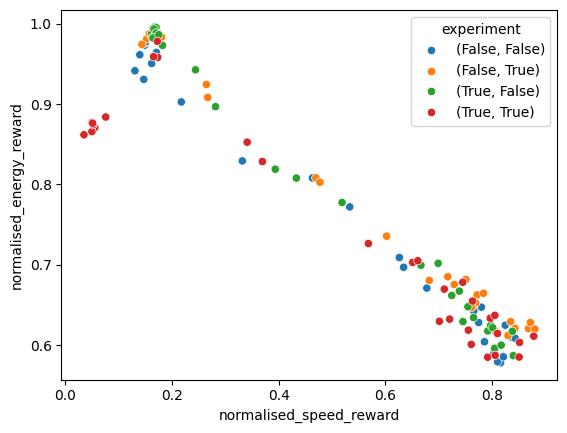

In [6]:
#plot all points
import seaborn as sns
sns.scatterplot(data=grouped_df, x='normalised_speed_reward', y='normalised_energy_reward', hue="experiment")

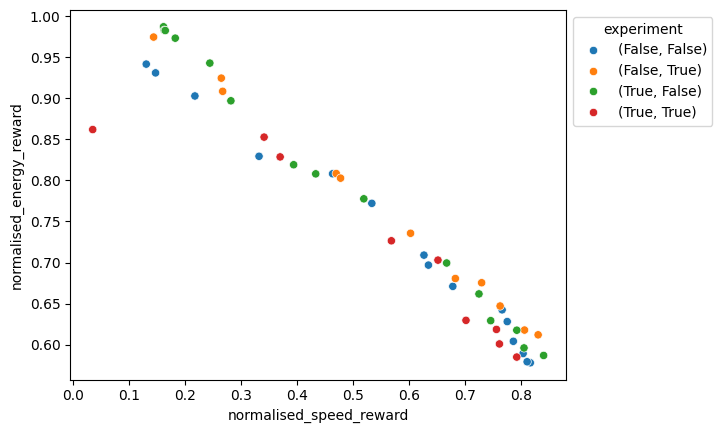

In [8]:
#plot only non-dominated points
ax = sns.scatterplot(data=grouped_df[grouped_df["pareto"]==True], x='normalised_speed_reward', y='normalised_energy_reward', hue="experiment")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [13]:
# num iterations
multi_index_list = ['use_reward_normalisation_wrapper', 'use_default_reward_normalisation', "weight_index"]
value_list = ["num_iterations"]
grouped_df = df_complete.groupby(multi_index_list)[value_list].mean()
index = grouped_df.index
grouped_df = grouped_df.reset_index()
grouped_df.set_index(index, inplace=True)
multi_index_list.remove("weight_index")
grouped_df["experiment"] = grouped_df[multi_index_list].apply(tuple, axis=1)

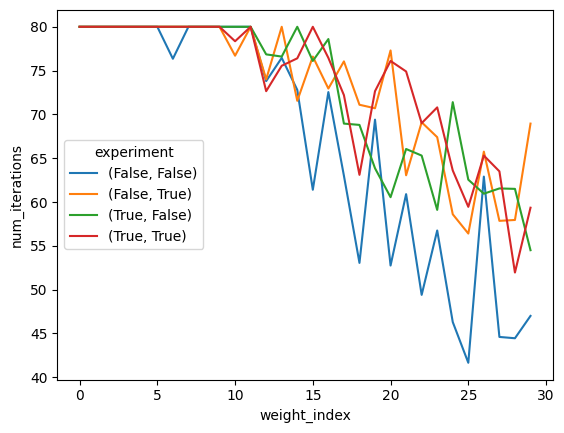

In [14]:
ax = sns.lineplot(grouped_df, x="weight_index", y="num_iterations", hue="experiment")
sns.move_legend(ax, "center left")